<a href="https://colab.research.google.com/github/satvik314/ai_experiments/blob/main/Autogen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyautogen

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.2/83.2 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.2/295.2 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.0/77.0 kB 9.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
llmx 0.0.15a0 requires cohere, which is not installed.
llmx 0.0.15a0 requires tiktoken, which is not installed.


In [ ]:
from getpass import getpass

OPENAI_API_KEY = getpass()

··········


In [ ]:
import autogen

config_list = [
    {
        "model" : "gpt-4",
        "api_key" : OPENAI_API_KEY
    },
    # {
    #     "model": "codellama-34b-instruct",
    #     "api_base": "https://api.perplexity.ai",
    #     "api_key": "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"
    # },
    # {
    #     "model": "llama-2-70b-chat",
    #     "api_base": "https://api.perplexity.ai",
    #     "api_key": "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"
    # }
]



llm_config = {
    "request_timeout" : 600,
    "seed" : 44,
    "config_list" : config_list,
    "temperature" : 0
}

### Math Agent

In [ ]:
from autogen.agentchat.contrib.math_user_proxy_agent import MathUserProxyAgent

autogen.ChatCompletion.start_logging()

assistant = autogen.AssistantAgent(
    name = 'assistant',
    system_message = 'You are a helpful assistant',
    llm_config = llm_config
)

mathproxyagent = MathUserProxyAgent(
    name = "mathproxyagent",
    human_input_mode = "NEVER",
    code_execution_config = {"use_docker" : False},
)

In [ ]:
math_problem = "Find all $x$ that satisfy the inequality $(2x+10)(x+3)<(3x+9)(x+8)$. Express your answer in interval notation."
mathproxyagent.initiate_chat(assistant, problem = math_problem)

mathproxyagent (to assistant):

Let's use Python to solve a math problem.

Query requirements:
You should always use the 'print' function for the output and use fractions/radical forms instead of decimals.
You can use packages like sympy to help you.
You must follow the formats below to write your code:
```python
# your code
```

First state the key idea to solve the problem. You may choose from three ways to solve the problem:
Case 1: If the problem can be solved with Python code directly, please write a program to solve it. You can enumerate all possible arrangements if needed.
Case 2: If the problem is mostly reasoning, you can solve it by yourself directly.
Case 3: If the problem cannot be handled in the above two ways, please follow this process:
1. Solve the problem step by step (do not over-divide the steps).
2. Take out any queries that can be asked through Python (for example, any calculations or equations that can be calculated).
3. Wait for me to give the results.
4. Continu

### Stock Analyst

In [ ]:
assistant = autogen.AssistantAgent(
    name = "Assistant",
    llm_config = llm_config,
)

# create a UserProxyAgent instance named "user_proxy"
user_proxy = autogen.UserProxyAgent(
    name="user_proxy",
    human_input_mode="NEVER",
    max_consecutive_auto_reply=10,
    is_termination_msg=lambda x: x.get("content", "").rstrip().endswith("TERMINATE"),
    code_execution_config={
        "work_dir": "coding",
        "use_docker": False,
    },
)
# the assistant receives a message from the user_proxy, which contains the task description
user_proxy.initiate_chat(
    assistant,
    message="""What date is today? Compare the year-to-date gain for META and TESLA.""",
)

user_proxy (to Assistant):

What date is today? Compare the year-to-date gain for META and TESLA.

--------------------------------------------------------------------------------
Assistant (to user_proxy):

First, let's get the current date using Python. 

```python
# python code
from datetime import date

# Get today's date
today = date.today()

print("Today's date:", today)
```

Next, we need to fetch the stock prices for META (Facebook) and TESLA for the current year. We can use the `yfinance` library in Python to fetch this data. If the library is not installed, it can be installed using pip:

```sh
# shell script
pip install yfinance
```

After installing the library, we can fetch the stock data:

```python
# python code
import yfinance as yf

# Get data for the current year
start_date = date(today.year, 1, 1)
end_date = today

# Fetch data for META and TESLA
meta_data = yf.download('META', start=start_date, end=end_date)
tesla_data = yf.download('TSLA', start=start_date, end=end

In [ ]:
# followup of the previous question
user_proxy.send(
    recipient=assistant,
    message="""Plot a chart of their stock price change YTD and save to stock_price_ytd.png.""",
)

user_proxy (to Assistant):

Plot a chart of their stock price change YTD and save to stock_price_ytd.png.

--------------------------------------------------------------------------------
Assistant (to user_proxy):

Sure, we can use the matplotlib library in Python to plot the chart. If the library is not installed, it can be installed using pip:

```sh
# shell script
pip install matplotlib
```

After installing the library, we can plot the chart:

```python
# python code
import matplotlib.pyplot as plt

# Plot META data
plt.plot(meta_data['Close'], label='META')

# Plot TESLA data
plt.plot(tesla_data['Close'], label='TESLA')

# Add title and labels
plt.title('Stock Price Change YTD')
plt.xlabel('Date')
plt.ylabel('Price')

# Add legend
plt.legend()

# Save the figure
plt.savefig('stock_price_ytd.png')

print("The chart has been saved as 'stock_price_ytd.png'.")
```

This code will plot the closing prices of META and TESLA over the year to date, add a title and labels to the chart, and

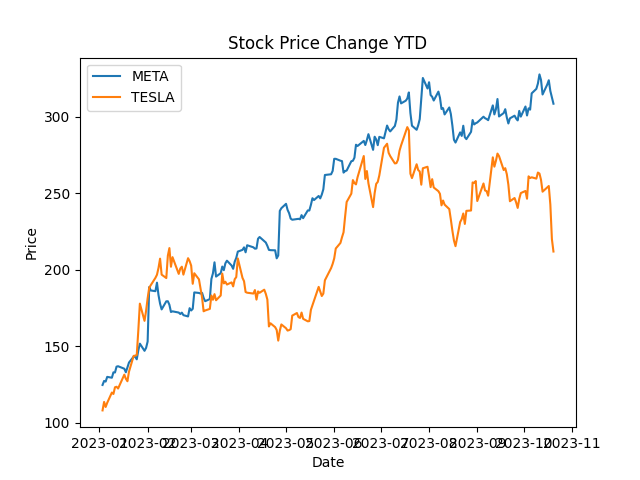

In [ ]:
from IPython.display import Image

Image(filename='coding/stock_price_ytd.png')

### Startup Team

In [ ]:
llm_config = {"config_list": config_list, "seed": 42}
user_proxy = autogen.UserProxyAgent(
   name="User_proxy",
   system_message="A human admin.",
   code_execution_config={"last_n_messages": 2, "work_dir": "groupchat"},
   human_input_mode="TERMINATE"
)
coder = autogen.AssistantAgent(
    name="Coder",
    llm_config=llm_config,
)
pm = autogen.AssistantAgent(
    name="Product_manager",
    system_message="Creative in software product ideas.",
    llm_config=llm_config,
)
groupchat = autogen.GroupChat(agents=[user_proxy, coder, pm], messages=[], max_round=12)
manager = autogen.GroupChatManager(groupchat=groupchat, llm_config=llm_config)

In [ ]:
user_proxy.initiate_chat(manager, message="Build a classic & basic pong game with 2 players in python. ")


User_proxy (to chat_manager):

Build a classic & basic pong game with 2 players in python. 

--------------------------------------------------------------------------------
Coder (to chat_manager):

Sure, I can help you with creating a pong game for two players. This game uses python `turtle` module to create a simple yet fun version of Pong.

We are going to create a screen, a ball, and two paddles, and define the behavior when the ball hits a paddle or edge of the screen. Each player gets to control one paddle with the keypad of the computer.


Here is a basic solution:
```python
# filename: pong_game.py

import turtle
import os

win = turtle.Screen()
win.title("Pong")
win.bgcolor("black")
win.setup(width=800, height=600)
win.tracer(0)

# Paddle A
paddle_a = turtle.Turtle()
paddle_a.speed(0)
paddle_a.shape("square")
paddle_a.color("white")
paddle_a.shapesize(stretch_wid=6, stretch_len=1)
paddle_a.penup()
paddle_a.goto(-350, 0)

# Paddle B
paddle_b = turtle.Turtle()
paddle_b.speed(0)

User_proxy (to chat_manager):

exitcode: 1 (execution failed)
Code output: 
Traceback (most recent call last):
  File "pong_game.py", line 6, in <module>
    win = turtle.Screen()
  File "/usr/lib/python3.10/turtle.py", line 3664, in Screen
    Turtle._screen = _Screen()
  File "/usr/lib/python3.10/turtle.py", line 3680, in __init__
    _Screen._root = self._root = _Root()
  File "/usr/lib/python3.10/turtle.py", line 435, in __init__
    TK.Tk.__init__(self)
  File "/usr/lib/python3.10/tkinter/__init__.py", line 2299, in __init__
    self.tk = _tkinter.create(screenName, baseName, className, interactive, wantobjects, useTk, sync, use)
_tkinter.TclError: no display name and no $DISPLAY environment variable


--------------------------------------------------------------------------------
Coder (to chat_manager):

I see that you're trying to run the program in an environment that doesn't support the creation of graphical user interfaces. The error you're getting typically occurs when try

User_proxy (to chat_manager):

exitcode: 1 (execution failed)
Code output: 
  File "", line 1
    python -m tkinter
              ^^^^^^^
SyntaxError: invalid syntax


--------------------------------------------------------------------------------
Coder (to chat_manager):

The error seems to be caused by running the `python -m tkinter` command inside a Python script or shell. This command is actually designed to be run in a system shell (like Command Prompt or Terminal), not inside a Python interpreter.

If you want to check if `tkinter` is correctly installed from within Python, you can use the following code instead:

```python
# filename: check_tkinter.py

try:
    import tkinter
    print("Tkinter is installed")
except ImportError:
    print("Tkinter is not installed")
```

You can save this Python script as `check_tkinter.py` and run it.

But, I'll continue with the Pong game creation assuming `tkinter` is installed, because `tkinter` comes pre-installed when you install Python.



>>>>>>>> EXECUTING CODE BLOCK 1 (inferred language is python)...


User_proxy (to chat_manager):

exitcode: 0 (execution succeeded)
Code output: 
Tkinter is installed

An exception occurred: no display name and no $DISPLAY environment variable


--------------------------------------------------------------------------------
Coder (to chat_manager):

I see that you have `Tkinter` installed, but the same `_tkinter.TclError: no display name and no $DISPLAY environment variable` error persists. This means you are likely running the script in an environment without a display, probably on a headless server or a remote machine through a SSH connection.

The python `turtle` module uses Tkinter for its graphical interface, which requires access to a display to render the graphics. When you run a Python script that uses Tkinter or turtle on a server without a display, this error will occur.

For your scenario, unable to display the GUI, and the implementation of a classic pong game using Python, it seems we've reached a dead end.

That said, it's not impossibl

INFO:autogen.oai.completion:retrying in 10 seconds...
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/autogen/oai/completion.py", line 224, in _get_response
    response = openai_completion.create(request_timeout=request_timeout, **config)
  File "/usr/local/lib/python3.10/dist-packages/openai/api_resources/chat_completion.py", line 25, in create
    return super().create(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/openai/api_resources/abstract/engine_api_resource.py", line 155, in create
    response, _, api_key = requestor.request(
  File "/usr/local/lib/python3.10/dist-packages/openai/api_requestor.py", line 299, in request
    resp, got_stream = self._interpret_response(result, stream)
  File "/usr/local/lib/python3.10/dist-packages/openai/api_requestor.py", line 710, in _interpret_response
    self._interpret_response_line(
  File "/usr/local/lib/python3.10/dist-packages/openai/api_requestor.py", line 775, in _interpret_respo

[autogen.oai.completion: 10-22 04:05:01] {252} INFO - retrying in 10 seconds...
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/autogen/oai/completion.py", line 224, in _get_response
    response = openai_completion.create(request_timeout=request_timeout, **config)
  File "/usr/local/lib/python3.10/dist-packages/openai/api_resources/chat_completion.py", line 25, in create
    return super().create(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/openai/api_resources/abstract/engine_api_resource.py", line 155, in create
    response, _, api_key = requestor.request(
  File "/usr/local/lib/python3.10/dist-packages/openai/api_requestor.py", line 299, in request
    resp, got_stream = self._interpret_response(result, stream)
  File "/usr/local/lib/python3.10/dist-packages/openai/api_requestor.py", line 710, in _interpret_response
    self._interpret_response_line(
  File "/usr/local/lib/python3.10/dist-packages/openai/api_requestor.py", lin

INFO:autogen.oai.completion:retrying in 10 seconds...
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/autogen/oai/completion.py", line 224, in _get_response
    response = openai_completion.create(request_timeout=request_timeout, **config)
  File "/usr/local/lib/python3.10/dist-packages/openai/api_resources/chat_completion.py", line 25, in create
    return super().create(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/openai/api_resources/abstract/engine_api_resource.py", line 155, in create
    response, _, api_key = requestor.request(
  File "/usr/local/lib/python3.10/dist-packages/openai/api_requestor.py", line 299, in request
    resp, got_stream = self._interpret_response(result, stream)
  File "/usr/local/lib/python3.10/dist-packages/openai/api_requestor.py", line 710, in _interpret_response
    self._interpret_response_line(
  File "/usr/local/lib/python3.10/dist-packages/openai/api_requestor.py", line 775, in _interpret_respo

KeyboardInterrupt: ignored